# Neural Network from Scratch

I implemented a neural network from scratch using NumPy and the relevant math(linear alegebra and calculus) to classify digits from the MNIST dataset. I only used Keras to load in the dataset.

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255., X_test/255.

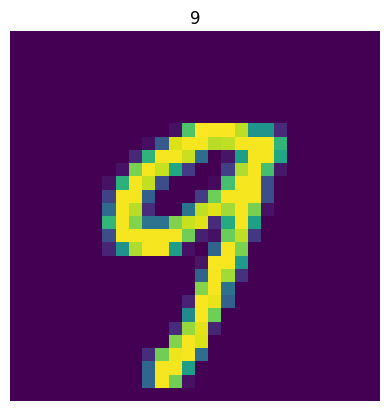

In [3]:
plt.imshow(X_train[45])
plt.axis('off')
plt.title(y_train[45])
plt.show()

In [4]:
X_train, X_test = X_train.T, X_test.T
(n, _, m) = X_train.shape
X_train = X_train.reshape(n*n, m)
X_train.shape

(784, 60000)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

The following functions create the neural network and train it on the training datset via forward propagation, backpropagation, and gradient descent. 

In [6]:
def init_parameters(nn_layers):
    W1 = np.random.rand(nn_layers[1], nn_layers[0]) - 0.5
    b1 = np.random.rand(nn_layers[1], 1) - 0.5
    W2 = np.random.rand(nn_layers[2], nn_layers[1]) - 0.5
    b2 = np.random.rand(nn_layers[2], 1) - 0.5
    W3 = np.random.rand(nn_layers[3], nn_layers[2]) - 0.5
    b3 = np.random.rand(nn_layers[3], 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    output = np.exp(Z) / sum(np.exp(Z))
    return output

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def one_hot_encode(y):
    encoded_y = np.zeros((y.size, y.max()+1))
    encoded_y[np.arange(y.size), y] = 1
    return encoded_y.T

def ReLU_derivative(Z):
    Z[Z<=0] = 0
    Z[Z>0] = 1
    return Z

def backward_prop(A1, Z1, A2, Z2, A3, Z3, W3, W2, X, y):
    dZ3 = A3 - one_hot_encode(y)
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    
    dZ2 = W3.T.dot(dZ3) * ReLU_derivative(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * ReLU_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3

def update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    return W1, b1, W2, b2, W3, b3

In [7]:
def predictions(A3):
    predictions = np.argmax(A3, 0)
    return predictions

def accuracy(A3, y):
    preds = predictions(A3)
    return np.sum(preds == y) / y.size
    
def gradient_descent(X, y, nn_layers, alpha, epochs):
    W1, b1, W2, b2, W3, b3 = init_parameters(nn_layers)
    for i in range(epochs):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(A1, Z1, A2, Z2, A3, Z3, W3, W2, X, y)
        W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print(f"Epoch: {i}/{epochs}")
            print(predictions(A3), y)
            acc = accuracy(A3, y)
            print(f"Accuracy: {acc}")
    return W1, b1, W2, b2, W3, b3

In [8]:
nn_layers = [784, 128, 64, 10]
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, y_train, nn_layers, 0.1, 500)

Epoch: 0/500
[9 4 9 ... 9 7 4] [5 0 4 ... 5 6 8]
Accuracy: 0.11828333333333334
Epoch: 10/500
[8 0 3 ... 1 0 8] [5 0 4 ... 5 6 8]
Accuracy: 0.39765
Epoch: 20/500
[6 0 3 ... 3 0 8] [5 0 4 ... 5 6 8]
Accuracy: 0.53365
Epoch: 30/500
[6 0 3 ... 3 0 8] [5 0 4 ... 5 6 8]
Accuracy: 0.6118
Epoch: 40/500
[6 0 3 ... 5 0 8] [5 0 4 ... 5 6 8]
Accuracy: 0.6648833333333334
Epoch: 50/500
[6 0 3 ... 5 0 8] [5 0 4 ... 5 6 8]
Accuracy: 0.7000166666666666
Epoch: 60/500
[6 0 3 ... 5 0 8] [5 0 4 ... 5 6 8]
Accuracy: 0.7276
Epoch: 70/500
[6 0 3 ... 5 0 8] [5 0 4 ... 5 6 8]
Accuracy: 0.74845
Epoch: 80/500
[5 0 3 ... 5 0 8] [5 0 4 ... 5 6 8]
Accuracy: 0.7654666666666666
Epoch: 90/500
[5 0 3 ... 5 0 8] [5 0 4 ... 5 6 8]
Accuracy: 0.7801666666666667
Epoch: 100/500
[5 0 3 ... 5 0 8] [5 0 4 ... 5 6 8]
Accuracy: 0.7923666666666667
Epoch: 110/500
[5 0 3 ... 5 0 8] [5 0 4 ... 5 6 8]
Accuracy: 0.8028166666666666
Epoch: 120/500
[5 0 3 ... 5 0 8] [5 0 4 ... 5 6 8]
Accuracy: 0.8114666666666667
Epoch: 130/500
[5 0 4 ... 5

~91% accuracy on the training dataset

The following functions are used to predict the labels for the test dataset.

In [9]:
def test_predictions(W1, b1, W2, b2, W3, b3, X, y):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    pred = predictions(A3)
    print(pred, y)
    acc = accuracy(A3, y)
    print(f"Accuracy: {acc}")
    return pred

def display(pred, X, y, i):
    print(f"Predicted Number: {pred[i]}")
    print(f"Actual Number: {y[i]}")
    img = X[:, i].reshape(n, n).T
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [10]:
(n, _, m) = X_test.shape
X_test = X_test.reshape(n*n, m)

In [11]:
final_pred = test_predictions(W1, b1, W2, b2, W3, b3, X_test, y_test)

[7 3 1 ... 4 5 6] [7 2 1 ... 4 5 6]
Accuracy: 0.9056


Correctly labels the test dataset ~91% of the time

Predicted Number: 8
Actual Number: 8


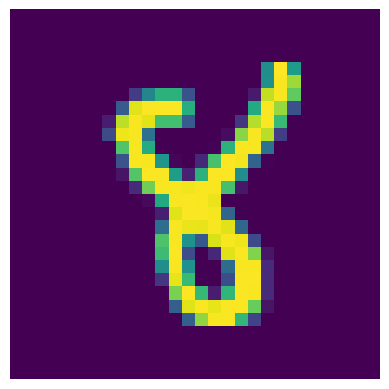

Predicted Number: 0
Actual Number: 0


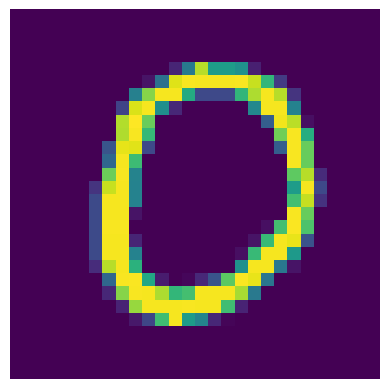

Predicted Number: 7
Actual Number: 7


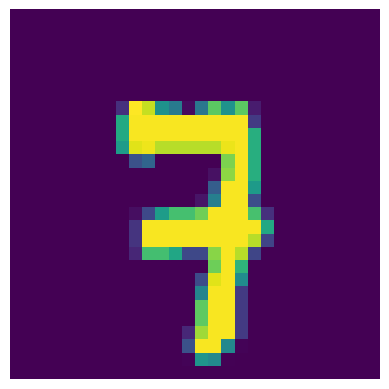

Predicted Number: 4
Actual Number: 4


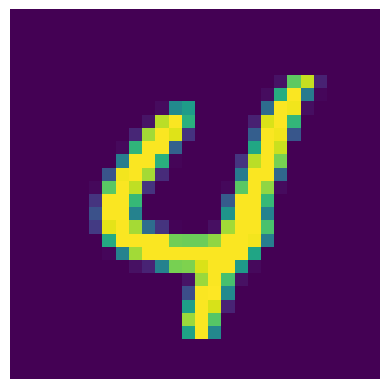

Predicted Number: 4
Actual Number: 4


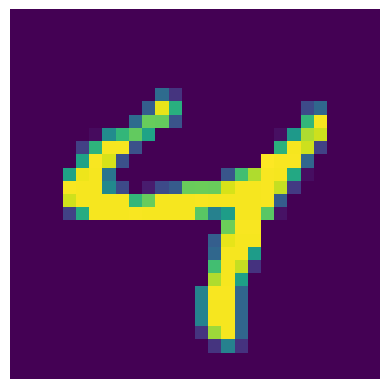

In [12]:
for i in range(5):
    display(final_pred, X_test, y_test, random.randint(0, m))